<p style="text-align: center;"><img src="https://upload.wikimedia.org/wikipedia/pt/1/1f/ITA_logo.png" alt="Resultado de imagem para logo ita" width="209" height="79" /></p>
<p style="text-align: center;"><span style="font-size: 14pt;">Instituto Tecnol&oacute;gico de Aeron&aacute;utica</span></p>
<p style="text-align: center;"><span style="font-size: 14pt;">P&oacute;s-Gradua&ccedil;&atilde;o em Engenharia Eletr&ocirc;nica e Computa&ccedil;&atilde;o</span></p>
<p style="text-align: center;"><span style="font-size: 14pt;"><strong>Orientador:</strong> Paulo Marcelo Tasinaffo</span></p>
<p style="text-align: center;"><span style="font-size: 14pt;"><strong>Co-orientador:</strong> Rodrigo Arnaldo Scarpel</span></p>
<p style="text-align: center;"><span style="font-size: 14pt;"><strong>Aluna:</strong> Bruna dos Santos Almeida</span></p>


# Regression Analysis

## Importing the Libraries

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
from sklearn.model_selection import train_test_split

Mounted at /content/gdrive


## Importing Data

In [2]:
folder = "/content/gdrive/My Drive/Colab/Thesis/data/"
filename_data_training_all = "data_training_all.csv"
path_data_data_training_all = folder + filename_data_training_all

data_training_all = pd.read_csv(path_data_data_training_all)

In [4]:
data_training_all.columns

Index(['layers', 'nodes_from_1', 'nodes_from_2', 'nodes_from_3', 'dataset',
       'iteration', 'accuracy', 'val_accuracy', 'loss', 'val_loss', 'auc',
       'val_auc', 'precision', 'val_precision', 'recall', 'val_recall', 'tp',
       'val_tp', 'fp', 'val_fp', 'tn', 'val_tn', 'fn', 'val_fn', 'loss_test',
       'accuracy_test', 'precision_test', 'recall_test', 'auc_test', 'tp_test',
       'fp_test', 'tn_test', 'fn_test', 'training_accuracy',
       'validation_accuracy', 'training_loss', 'validation_loss',
       'training_auc', 'validation_auc', 'training_precision',
       'validation_precision', 'training_recall', 'validation_recall',
       'training_tp', 'validation_tp', 'training_fp', 'validation_fp',
       'training_tn', 'validation_tn', 'training_fn', 'validation_fn',
       'weights', 'flip_y', 'n_features', 'C1_metrics', 'C2_metrics',
       'C3_metrics', 'C4_metrics', 'L1_metrics', 'L2_metrics', 'L3_metrics',
       'S1_metrics', 'S2_metrics', 'S3_metrics', 'S4_metrics', 

In [14]:
columns = ['layers','weights', 'flip_y', 'n_features', 'C1_metrics', 
           'C2_metrics', 'C3_metrics', 'C4_metrics', 'L1_metrics',
           'L2_metrics', 'L3_metrics', 'S1_metrics', 'S2_metrics', 
           'S3_metrics','S4_metrics', 'T2_metrics',  'training_accuracy']
len(columns)

17

In [24]:
data_training_and_metrics = data_training_all[columns].astype(float)

In [25]:
data_training_and_metrics.head()

,layers,weights,flip_y,n_features,C1_metrics,C2_metrics,C3_metrics,C4_metrics,L1_metrics,L2_metrics,L3_metrics,S1_metrics,S2_metrics,S3_metrics,S4_metrics,T2_metrics,training_accuracy
0,1.0,0.5,0.01,5.0,0.831126,0.339699,0.703,0.7442,0.226134,0.079115,0.061708,0.061706,0.35233,0.0606,0.05451,2000.0,0.939236
1,1.0,0.5,0.01,5.0,0.831126,0.339699,0.703,0.7442,0.226134,0.079115,0.061708,0.061706,0.35233,0.0606,0.05451,2000.0,0.939556
2,1.0,0.5,0.01,5.0,0.831126,0.339699,0.703,0.7442,0.226134,0.079115,0.061708,0.061706,0.35233,0.0606,0.05451,2000.0,0.939270
3,1.0,0.5,0.01,5.0,0.831126,0.339699,0.703,0.7442,0.226134,0.079115,0.061708,0.061706,0.35233,0.0606,0.05451,2000.0,0.939200
4,1.0,0.5,0.01,5.0,0.831126,0.339699,0.703,0.7442,0.226134,0.079115,0.061708,0.061706,0.35233,0.0606,0.05451,2000.0,0.939436


In [ ]:
data_training_and_metrics

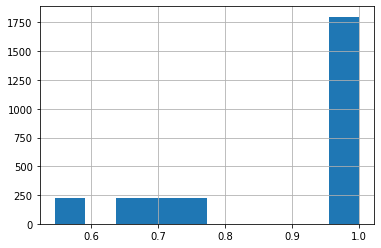

In [67]:
data_training_and_metrics['C4_metrics'].hist()

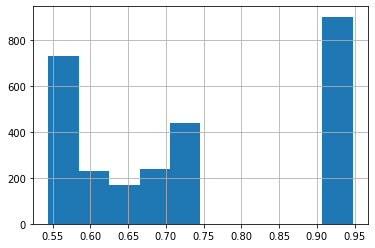

In [29]:
data_training_and_metrics['training_accuracy'].hist()

# Standard Scaler

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
standard_data_training_and_metrics = pd.DataFrame(data = StandardScaler().fit_transform(data_training_and_metrics), columns = columns)

In [28]:
standard_data_training_and_metrics.head()

,layers,weights,flip_y,n_features,C1_metrics,C2_metrics,C3_metrics,C4_metrics,L1_metrics,L2_metrics,L3_metrics,S1_metrics,S2_metrics,S3_metrics,S4_metrics,T2_metrics,training_accuracy
0,-0.989949,-1.521278,-1.310359,-1.202703,1.803166,3.175816,0.907475,-0.860778,-1.059745,-1.168259,-1.22177,-1.706258,-1.365168,-1.712257,-0.238251,1.412667,1.316898
1,-0.989949,-1.521278,-1.310359,-1.202703,1.803166,3.175816,0.907475,-0.860778,-1.059745,-1.168259,-1.22177,-1.706258,-1.365168,-1.712257,-0.238251,1.412667,1.318942
2,-0.989949,-1.521278,-1.310359,-1.202703,1.803166,3.175816,0.907475,-0.860778,-1.059745,-1.168259,-1.22177,-1.706258,-1.365168,-1.712257,-0.238251,1.412667,1.317121
3,-0.989949,-1.521278,-1.310359,-1.202703,1.803166,3.175816,0.907475,-0.860778,-1.059745,-1.168259,-1.22177,-1.706258,-1.365168,-1.712257,-0.238251,1.412667,1.316671
4,-0.989949,-1.521278,-1.310359,-1.202703,1.803166,3.175816,0.907475,-0.860778,-1.059745,-1.168259,-1.22177,-1.706258,-1.365168,-1.712257,-0.238251,1.412667,1.318176


In [38]:
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [41]:
X = standard_data_training_and_metrics[columns[:-1]]
y = standard_data_training_and_metrics[columns[-1]]

In [42]:
nb_degree = 4

polynomial_features = PolynomialFeatures(degree = nb_degree)

X_TRANSF = polynomial_features.fit_transform(X)

In [43]:
model = LinearRegression()

model.fit(X_TRANSF, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
Y_NEW = model.predict(X_TRANSF)

rmse = np.sqrt(mean_squared_error(y,Y_NEW))
r2 = r2_score(y,Y_NEW)

print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  0.006402761657023959
R2:  0.9999590046431633


In [65]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [66]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:      training_accuracy   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.635e+05
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:43:07   Log-Likelihood:                 6539.5
No. Observations:                2700   AIC:                        -1.304e+04
Df Residuals:                    2683   BIC:                        -1.294e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.053e-16      0.000   7.36e-13      1.0